In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Malgun Gothic'

In [2]:
df1 = pd.read_csv('./1-1. 납품(계약처 3개).csv', engine='python', encoding='utf-8')
df2 = pd.read_csv('./1-2. 직송(계약처 3개).csv', engine='python', encoding='utf-8')
df3 = pd.read_csv('./1-3. 출하(계약처 3개).csv', engine='python', encoding='utf-8')

In [3]:
df1['도착지'].unique()

array([4023806, 4147494, 4198463])

In [4]:
df1['수량'].sum()

5246970

In [5]:
df2['도착지'].unique()

array([4023806, 4147494])

In [6]:
df2['수량'].sum()

18348

In [7]:
df3['출발지'].unique()

array([4023806, 4147494, 4198463])

In [8]:
df3['수량'].sum()

3115327

In [9]:
df1['날짜'] = pd.to_datetime(df1['날짜'], format="%Y%m%d")
df2['날짜'] = pd.to_datetime(df2['날짜'], format="%Y%m%d")
df3['날짜'] = pd.to_datetime(df3['날짜'], format="%Y%m%d")

### 계약처 분석 코드

- 4023806: 상위 1위
- 4198463: 상위 100위
- 4147494: 상위 1000위

# 1. 납품 1순위 계약처 - 4023806

In [10]:
df11 = df1[df1['도착지'] == 4023806]
df12 = df2[df2['도착지'] == 4023806]
df13 = df3[df3['출발지'] == 4023806]

In [11]:
df11a = df11.groupby('날짜')[['수량']].sum()
df12a = df12.groupby('날짜')[['수량']].sum()
df13a = df13.groupby('날짜')[['수량']].sum()

In [12]:
df11a = df11a.reindex(pd.date_range(pd.to_datetime('2010-01-01'), pd.to_datetime('2018-06-30'), freq='d')).fillna(0)
df12a = df12a.reindex(pd.date_range(pd.to_datetime('2010-01-01'), pd.to_datetime('2018-06-30'), freq='d')).fillna(0)
df13a = df13a.reindex(pd.date_range(pd.to_datetime('2010-01-01'), pd.to_datetime('2018-06-30'), freq='d')).fillna(0)

In [13]:
df_first = pd.concat([df11a, df12a, df13a], axis=1)
df_first.columns = ['납품', '직송', '출하']

## 1-1. 연기준

In [14]:
df_first.resample('m').sum().tail()

,납품,직송,출하
2018-02-28,33012.0,0.0,26030.0
2018-03-31,38016.0,256.0,22328.0
2018-04-30,36880.0,256.0,24687.0
2018-05-31,34288.0,0.0,20638.0
2018-06-30,30720.0,0.0,20854.0


/anaconda3/envs/nextopt/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


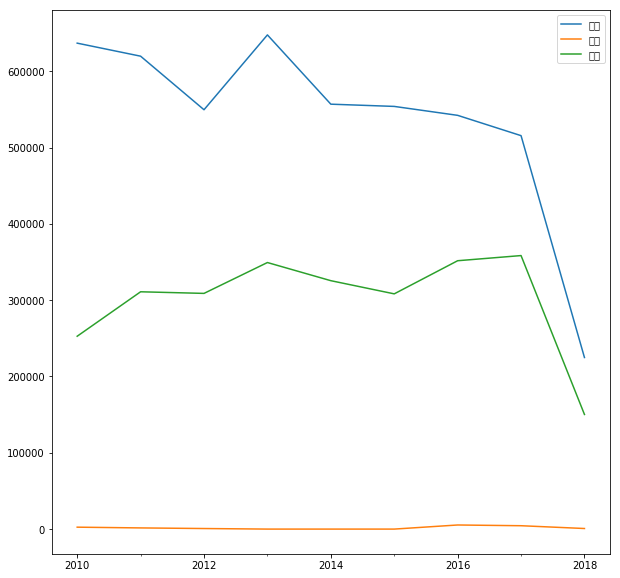

In [15]:
df_first.resample('1Y').sum().plot(figsize=(10,10))

### 1) 직송은 적다.

### 2) 연 기준으로 봤을 때는 발주와 출하가 어느정도 같이 가는 모습

## 2. 월 기준

/anaconda3/envs/nextopt/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


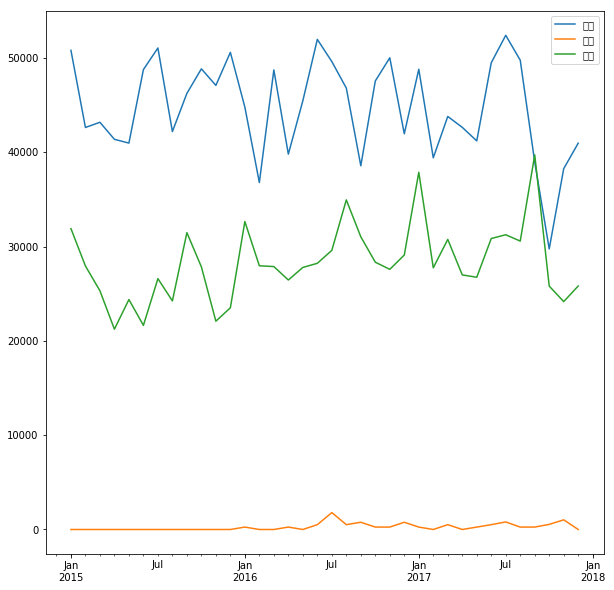

In [16]:
df_first['2015':'2017'].resample('1M').sum().plot(figsize=(10,10))

### 1) 출하가 납품을 따라가는 경향성이 보인다.

## 1-3. 주 기준

/anaconda3/envs/nextopt/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


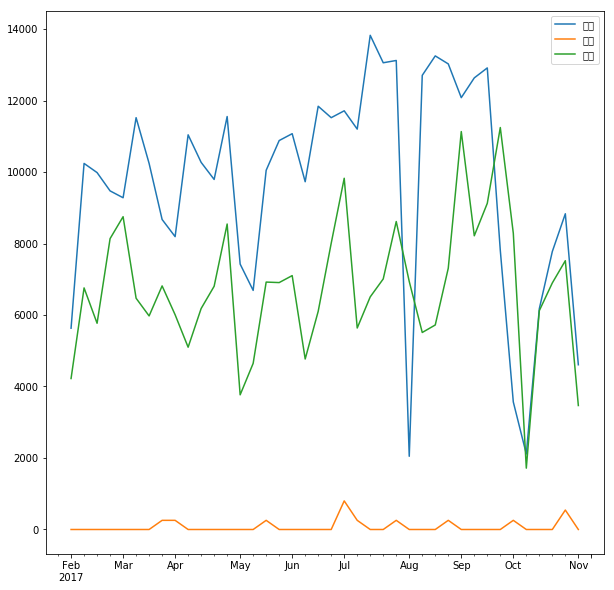

In [17]:
df_first['2017-02':'2017-10'].resample('1W').sum().plot(figsize=(10,10))

## 1-4. 일 기준

/anaconda3/envs/nextopt/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


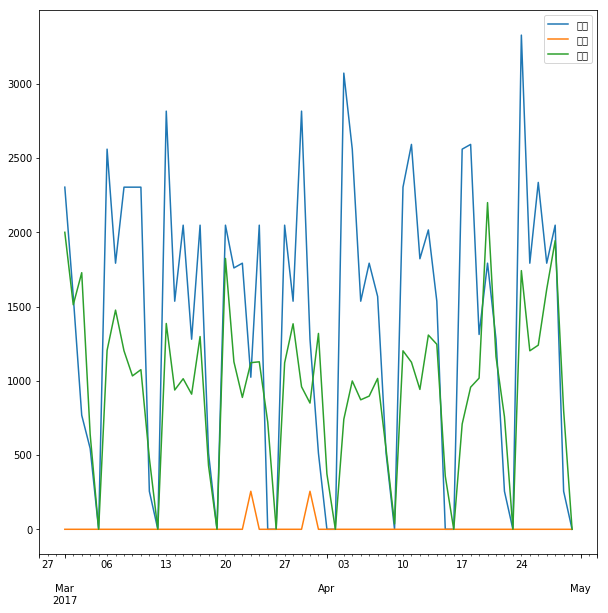

In [18]:
df_first['2017-03':'2017-04'].resample('1D').sum().plot(figsize=(10,10))

# 2. 납품 100순위 계약처 - 4198463

In [19]:
df11 = df1[df1['도착지'] == 4198463]
df12 = df2[df2['도착지'] == 4198463]
df13 = df3[df3['출발지'] == 4198463]

In [20]:
df11a = df11.groupby('날짜')[['수량']].sum()
df12a = df12.groupby('날짜')[['수량']].sum()
df13a = df13.groupby('날짜')[['수량']].sum()

In [21]:
df11a = df11a.reindex(pd.date_range(pd.to_datetime('2010-01-01'), pd.to_datetime('2018-06-30'), freq='d')).fillna(0)
df12a = df12a.reindex(pd.date_range(pd.to_datetime('2010-01-01'), pd.to_datetime('2018-06-30'), freq='d')).fillna(0)
df13a = df13a.reindex(pd.date_range(pd.to_datetime('2010-01-01'), pd.to_datetime('2018-06-30'), freq='d')).fillna(0)

In [22]:
df_second = pd.concat([df11a, df12a, df13a], axis=1)
df_second.columns = ['납품', '직송', '출하']

In [23]:
df_second.resample('m').sum().tail()

,납품,직송,출하
2018-02-28,10176.0,0.0,8301.0
2018-03-31,10697.0,0.0,9580.0
2018-04-30,9403.0,0.0,6645.0
2018-05-31,7427.0,0.0,6153.0
2018-06-30,5501.0,0.0,6115.0


## 2-1. 연기준

/anaconda3/envs/nextopt/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


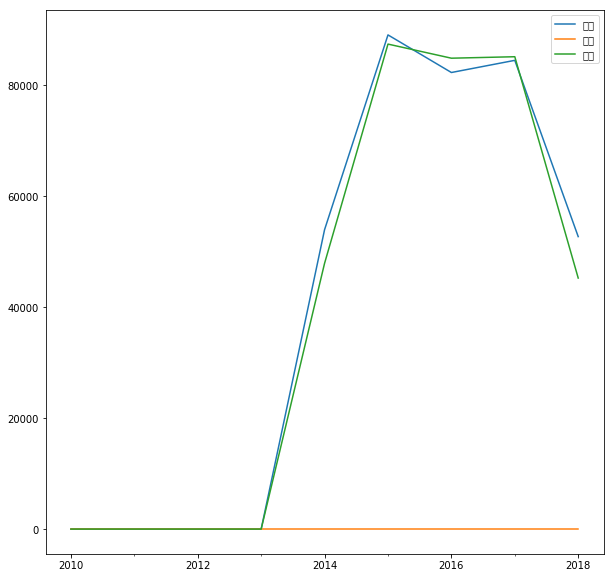

In [24]:
df_second.resample('1Y').sum().plot(figsize=(10,10))

### 1) 직송은 적다.

### 2) 연 기준으로 봤을 때는 발주와 출하가 같이 가는 모습

## 2-2. 월 기준


/anaconda3/envs/nextopt/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


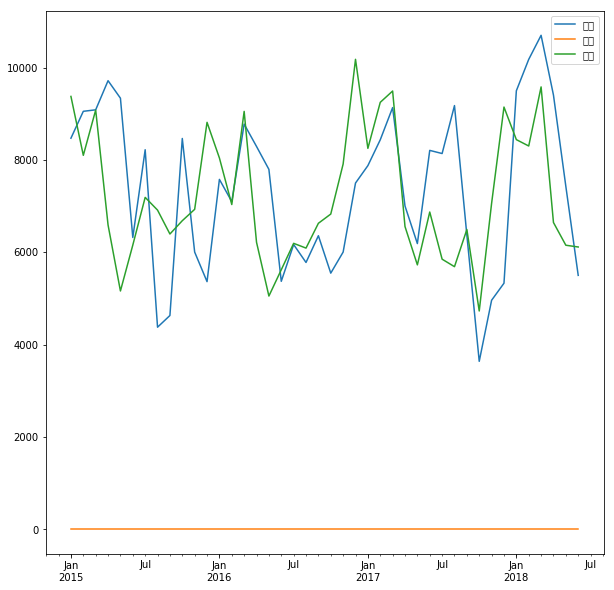

In [25]:
df_second['2015':].resample('1M').sum().plot(figsize=(10,10))

### 1) 1번과는 또 다르게 출하가 많고 나서 납품이 많아진다.
-> 두 방향 모두 이해가 감

## 2-3. 주 기준

/anaconda3/envs/nextopt/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


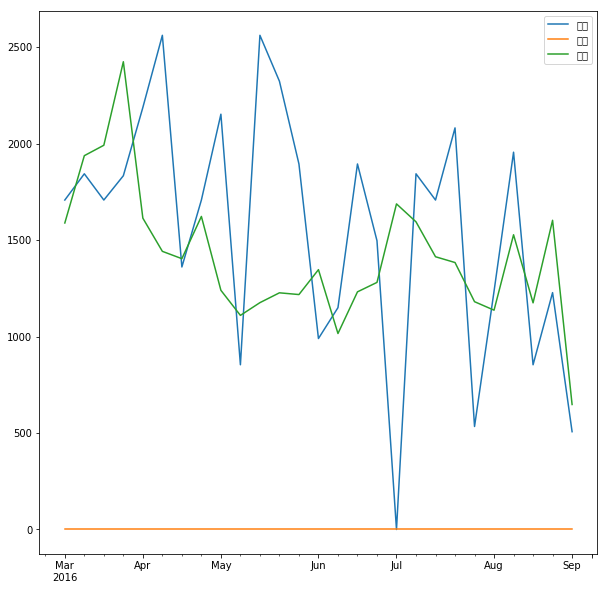

In [26]:
df_second['2016-03':'2016-08'].resample('1w').sum().plot(figsize=(10,10))

### 3) 주 기준으로 봤을 때 월보다 의미 파악 어려움

# 3. 납품 1000순위 - 4147494

In [27]:
df11 = df1[df1['도착지'] == 4147494]
df12 = df2[df2['도착지'] == 4147494]
df13 = df3[df3['출발지'] == 4147494]

df11a = df11.groupby('날짜')[['수량']].sum()
df12a = df12.groupby('날짜')[['수량']].sum()
df13a = df13.groupby('날짜')[['수량']].sum()

df11a = df11a.reindex(pd.date_range(pd.to_datetime('2010-01-01'), pd.to_datetime('2018-06-30'), freq='d')).fillna(0)
df12a = df12a.reindex(pd.date_range(pd.to_datetime('2010-01-01'), pd.to_datetime('2018-06-30'), freq='d')).fillna(0)
df13a = df13a.reindex(pd.date_range(pd.to_datetime('2010-01-01'), pd.to_datetime('2018-06-30'), freq='d')).fillna(0)

df_third = pd.concat([df11a, df12a, df13a], axis=1)
df_third.columns = ['납품', '직송', '출하']

In [28]:
df_third.resample('1m').sum().tail()

,납품,직송,출하
2018-02-28,394.0,0.0,368.0
2018-03-31,232.0,0.0,430.0
2018-04-30,406.0,0.0,346.0
2018-05-31,404.0,0.0,395.0
2018-06-30,404.0,0.0,354.0


## 3-1. 연기준


/anaconda3/envs/nextopt/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


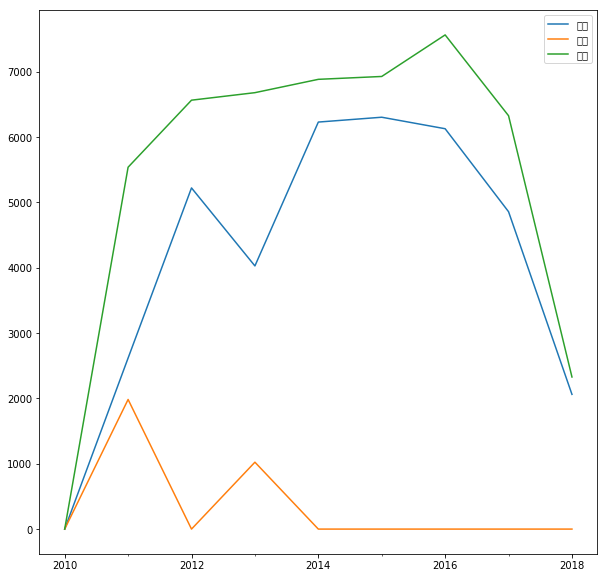

In [29]:
df_third.resample('1Y').sum().plot(figsize=(10,10))

### 1) 직송은 적다.

### 2) 연 기준으로 봤을 때는 발주와 출하가 같이 가는 모습

## 3-2. 월 기준

/anaconda3/envs/nextopt/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


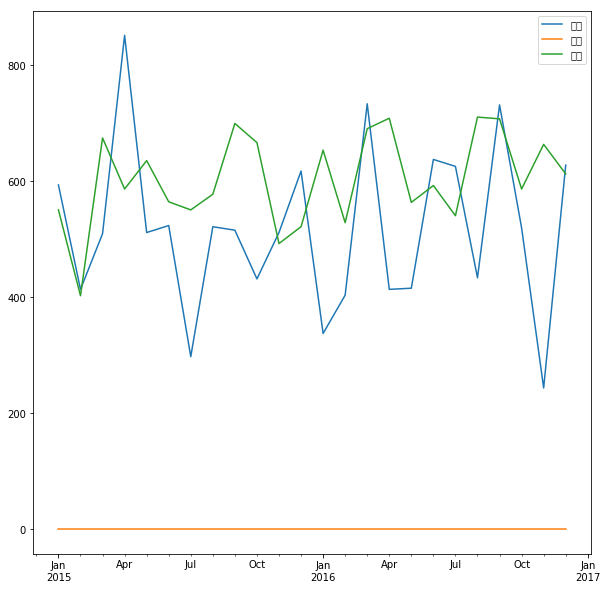

In [30]:
df_third['2015':'2016'].resample('1M').sum().plot(figsize=(10,10))

### 1) 출하가 선행한다.

## 3-3. 주 기준

/anaconda3/envs/nextopt/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


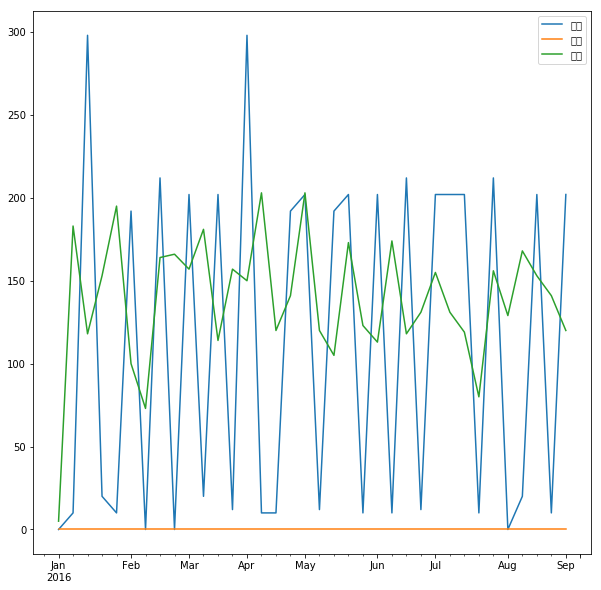

In [31]:
df_third['2016-01':'2016-08'].resample('1w').sum().plot(figsize=(10,10))